# Chapter08 차원 축소

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

- **차원 축소**의 장점  :

1. 특성 수를 크게 줄여서 훈련 속도를 높일 수 있다.

2. **데이터 시각화에 아주 유용하다!!**

 : 차원 수를 (둘 또는 셋으로) 줄이면 고차원 훈련 세트를 하나의 압축된 그래프로 그릴 수 있어서 중요한 통찰을 얻을 수 있다.

 (3차원 이상의 그래프는 직관적으로 상상하기 어렵기 때문에)

### 8.1 차원의 저주

- 차원의 저주 : 너무 많은 특성을 가지고 있어 생기는 문제

고차원 공간에서 임의로 두 점을 선택하면 두 점 사이의 거리가 멀리 떨어져 있을 가능성이 높다.

차원의 저주 해결법 :

1. 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련세트의 크기를 키우는 것

2. 차원 축소

### 8.2 차원 축소를 위한 접근 방법

- 투영 :

 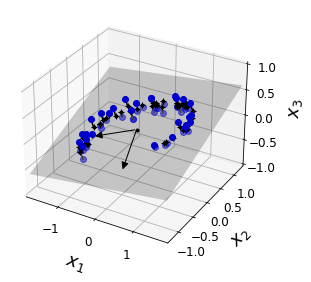
 
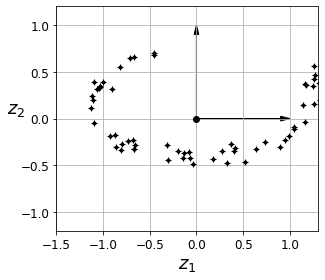

고차원 (3D) 데이터셋을 저차원 (2D)에 **투영**하여 2D 데이터셋을 얻을 수 있다.

- 매니폴드 학습 :
 
 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 매니폴드 가설에 근거한다.
 
 - 매니폴드 가정 : 처리해야 할 작업이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이란 가정을 종종 암묵적으로 병행
 
   (항상 유효하지는 않음)

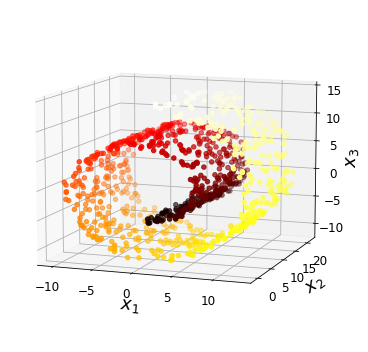

### 8.3 PCA

- PCA (주성분 분석) principal component analysis :
 
 먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시킨다.

1. 올바른 초평면 선택 (분산 보존)

 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적으로 보인다.

2. 주성분 찾기

 훈련세트에서 분산이 최대인 축 (1번째 주성분)을 찾고, 그  축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축이 2번째 주성분이 된다.

 고차원 데이터셋이라면 PCA는 이전의 두 축에 직교하는 세 번째, ... n번째 축을 찾는다 ( $i$번째 축 == $i$번째 주성분 )

- 특이값 분해 (SVD)로 훈련 세트 행렬 X를 세 행렬의 곱셈인 $U \Sigma V^T$로 분해할 수 있다. --> $V$에 모든 주성분의 단위 벡터가 담겨있다.

주성분 행렬 : 

 $V = \Bigg(\begin{align}
|\quad&|\qquad|\\
c1\;c&2 ...c_n\\
|\quad&|\qquad|\\
\end{align}\Bigg)$

3. d차원으로 투영하기

 초평면에 훈련 세트를 투영하고 d차원으로 축소된 $X_{d-proj}$을 얻기 위해서는 행렬 $X$와 $V$의 첫 $d$열로 구성된 행렬 $W_d$를 행렬 곱셈

- 훈련 세트를 d차원으로 투영하기 :

 $X_{d-proj} = X\,W_d$

In [2]:
# 3D 데이터셋 생성
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print(X.shape)

(60, 3)


In [3]:
X_centered = X - X.mean(axis=0)  # 데이터를 중앙에 맞춘다
U, s, Vt = np.linalg.svd(X_centered) # 모든 주성분을 구함
print(Vt.T)

c1 = Vt.T[:,0]  # 첫 번째 주성분
c2 = Vt.T[:,1]  # 두 번째 주성분
print(f"첫 번째 주성분 : {c1}\n두 번째 주성분 : {c2}")

[[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]
첫 번째 주성분 : [0.93636116 0.29854881 0.18465208]
두 번째 주성분 : [-0.34027485  0.90119108  0.2684542 ]


In [4]:
W2 = Vt.T[:,:2]  # 첫 두개의 주성분 벡터
X2D = X_centered.dot(W2)  # 3차원 훈련세트를 2차원으로 투영
X2D.shape

(60, 2)

사이킷런 사용하기

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # n_components=n: n차원으로 줄임
X2D = pca.fit_transform(X)  # 자동으로 데이터를 중앙에 맞춰준다

pca.components_.T  # 첫 n번째 주성분 벡터 (Wd)

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

설명된 분산의 비율 : 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타냄

In [6]:
pca.explained_variance_ratio_  # 설명된 분산 비율

# 3번째 PC에는 1.2% 미만이 남아 있을 것이므로 아주 적은 양의 정보가 들어 있다

array([0.84248607, 0.14631839])

- 적절한 차원 수 선택하기 :

 축소할 차원 수를 임의로 정하기보다는 충분한 분산 (ex.95%)이 될 때까지 더해야할 차원 수를 선택하는 것이 간단하다.

 데이터 시각화를 위해 차원축소 할 경우에는 2개나 3개로 줄이는 것이 일반적이다.

MNIST 압축하기 (784 차원 축소)

In [7]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [8]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
# PCA를 계산한 뒤 훈련세트의 분산을 95%로 유지하는 필요한 최소한의 차원 수 계산
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
cumsum.shape, d

# 784차원을 154차원으로 축소함 (분산 95% 보존)

((784,), 154)

In [10]:
pca = PCA(n_components=0.95)  # n_components를 0~1 사이로 지정하면 분산보존 비율을 지정하는 것이 된다
X_reduced = pca.fit_transform(X_train)

In [11]:
pca.n_components_, np.sum(pca.explained_variance_ratio_)

(154, 0.9503684424557437)

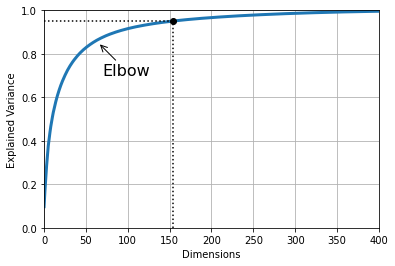

In [12]:
# 설명된 분산을 차원 수에 대한 함수로 그려 적절한 차원 수 고르기
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [13]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [14]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)  # 154차원으로 압축
X_recovered = pca.inverse_transform(X_reduced) # 784차원으로 다시 복원
# inverse_transform: 압축된 것을 복원하는 메서드

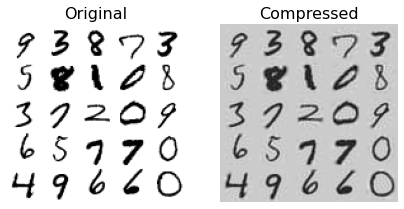

In [16]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

5% 정도 소실되었지만 숫자 모양은 거의 온전한 상태이다.

- 원본의 차원 수로 돌리는 PCA 역변환 공식 :

 $X_{recovered} = X_{d-proj}\, W_d^T$

- 랜덤 PCA :

 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾는다.

 - 완전 SVD 계산복잡도 = $O(m \times n^2) + O(n^3)$

 - 랜덤 PCA 계산복잡도 = $O(m \times d^2) + O(d^3)$

 d가 n보다 많이 작으면 완전 SVD보다 훨씬 빠르다.

사이킷런의 svd_solver의 기본값은 "auto"이다. 

m이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 사이킷런은 자동으로 랜덤 PCA 알고리즘을 사용한다.

완전 SVD 방식 : svd_solver="full"

In [17]:
# svd_solver='randomized'로 지정하여 랜덤 PCA 사용
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

In [18]:
X_reduced_pca = X_reduced

- 점진적 PCA (IPCA) : 
 
 훈련세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다.

 훈련세트가 클 때 유용하고 온라인 (새로운 데이터가 준비되는 대로 실시간으로) PCA를 적용할 수 있다.

In [19]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches): # np.array_split()으로 100개의 미니배치로 나눈다
    inc_pca.partial_fit(X_batch)  # 배열의 일부만 사용하여 fit
                                  # 일반적인 fit() 사용시 
X_reduced = inc_pca.transform(X_train)

In [20]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [21]:
X_reduced_inc_pca = X_reduced

In [22]:
x = np.array([[1,2,3],
              [4,5,6]])
a = np.array_split(x, 2)  # 배열을 나누어주는 메서드
print(a)

[array([[1, 2, 3]]), array([[4, 5, 6]])]


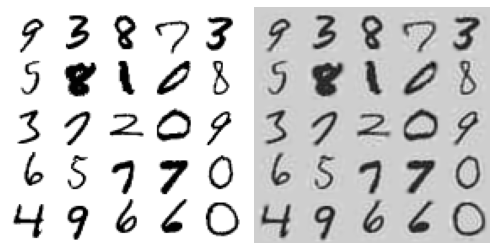

In [23]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()
plt.show()

In [24]:
# 일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 평균은 같으나..
np.allclose(pca.mean_, inc_pca.mean_)

True

하지만 결과는 완전히 똑같지는 않다. --> 점진적 PCA는 아주 훌륭한 근사치를 제공하지만 완벽하지는 않다.

In [25]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

IPCA는 특정 순간에 배열의 일부만 사용하기 때문에 메모리 부족 문제를 해결할 수 있다.

In [26]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [27]:
del X_mm

In [28]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
# IPCA의 fit()메서드는 batch_size만큼 전체 훈련 데이터를 미니배치로 나누어 partial_fit()메서드를 호출한다

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [29]:
reduced_X_mm = inc_pca.transform(X_mm)

In [30]:
reduced_X_mm.shape

(52500, 154)

### 8.3 커널 PCA (kPCA)

5장의 커널 트릭 (비선형 분류와 회귀를 가능하게 하는 수학적 기법) 과 같은 기법을 PCA에 적용해서,

차원 축소를 위한 복잡한 비선형 투영을 수행할 수 있다.

- 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용하다.

In [73]:
# 스위스롤 데이터셋 1000개 생성
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

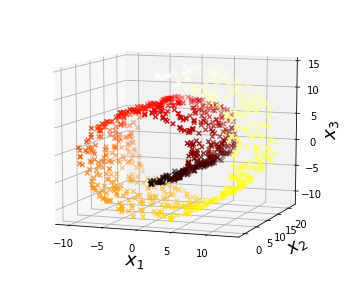

In [81]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot, marker='x')
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

In [75]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.04)  # rbf커널 적용
X_reduced = rbf_pca.fit_transform(X)

여러가지 커널의 kPCA를 사용해 스위스롤 데이터셋을 2D로 축소시켜보자.

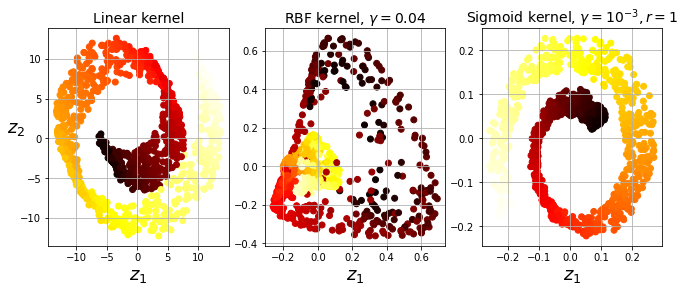

In [80]:
from sklearn.decomposition import KernelPCA

# 일반적인 PCA (선형 커널)
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
# rbf 커널
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
# 시그모이드 커널
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9  # 군집 기준

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")     # 군집화
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
plt.show()

kPCA는 비지도 학습이기 때문에 분류 모델에 평가를 하면서 kPCA 매개변수를 바꿔가면서 최적의 하이퍼파라미터를 찾을 수 있다.

In [83]:
# (kPCA로 차원축소 후, 분류하기 --> 그리드서치하는) 파이프라인 형성

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ('kpca', KernelPCA(n_components=2)),
        ('log_reg', LogisticRegression())
])

# GridSearch 할 kpca 하이퍼파라미터
param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [89]:
print(grid_search.best_params_) # 최적의 하이퍼파라미터

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


kPCA로 투영된 샘플을 훈련세트로, 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델을 훈련시키는 방법도 있다.

In [90]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)     # 기본값은 fit_inverse_transform=False이다.
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [91]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766146

이렇게 되면 재구성 원상 오차를 최소화하는 커널과 하이퍼파라미터를 찾기 위해 교차 검증으로 GridSearch를 사용할 수 있다.

### 8.5 지역 선형 임베딩 (LLE)

또 다른 비선형 차원축소(NLDR) 기술, 투영에 의존하지 않는 매니폴드 학습.

1. 먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정한다.

2. 그런 다음 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다.